In [1]:
from __future__ import absolute_import, division, print_function

#@markdown This sets the warning status (default is `ignore`, since this notebook runs correctly)
warning_status = "ignore" #@param ["ignore", "always", "module", "once", "default", "error"]
import warnings
warnings.filterwarnings(warning_status)
with warnings.catch_warnings():
    warnings.filterwarnings(warning_status, category=DeprecationWarning)
    warnings.filterwarnings(warning_status, category=UserWarning)

import numpy as np
import os
#@markdown This sets the styles of the plotting (default is styled like plots from [FiveThirtyeight.com](https://fivethirtyeight.com/))
matplotlib_style = 'fivethirtyeight' #@param ['fivethirtyeight', 'bmh', 'ggplot', 'seaborn', 'default', 'Solarize_Light2', 'classic', 'dark_background', 'seaborn-colorblind', 'seaborn-notebook']
import matplotlib as mpl
import matplotlib.pyplot as plt; plt.style.use(matplotlib_style)
import matplotlib.axes as axes;
from matplotlib.patches import Ellipse
from mpl_toolkits.mplot3d import Axes3D
import pandas_datareader.data as web
%matplotlib inline
import seaborn as sns; sns.set_context('notebook')
from IPython.core.pylabtools import figsize
#@markdown This sets the resolution of the plot outputs (`retina` is the highest resolution)
notebook_screen_res = 'retina' #@param ['retina', 'png', 'jpeg', 'svg', 'pdf']
%config InlineBackend.figure_format = notebook_screen_res

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv("clean-ifood-data.csv")
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Z_Revenue,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital,education,YearsAsCustomer
0,58138.0,0,0,58,635,88,546,172,88,88,...,11,1,63,2822,1529,1441,0,Single,Graduation,8
1,46344.0,1,1,38,11,1,6,2,1,6,...,11,0,66,2272,21,15,0,Single,Graduation,6
2,71613.0,0,0,26,426,49,127,111,21,42,...,11,0,55,2471,734,692,0,Together,Graduation,7
3,26646.0,1,0,26,11,4,20,10,3,5,...,11,0,36,2298,48,43,0,Together,Graduation,6
4,58293.0,1,0,94,173,43,118,46,27,15,...,11,0,39,2320,407,392,0,Married,PhD,6


In [4]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'marital', 'education', 'YearsAsCustomer'],
      dtype='object')

# PREVIOUS CAMPAIGN RESPONSE ANALYSIS

In this section we're going to take a high-level glance of how our customers have been responding to our previous campaigns.

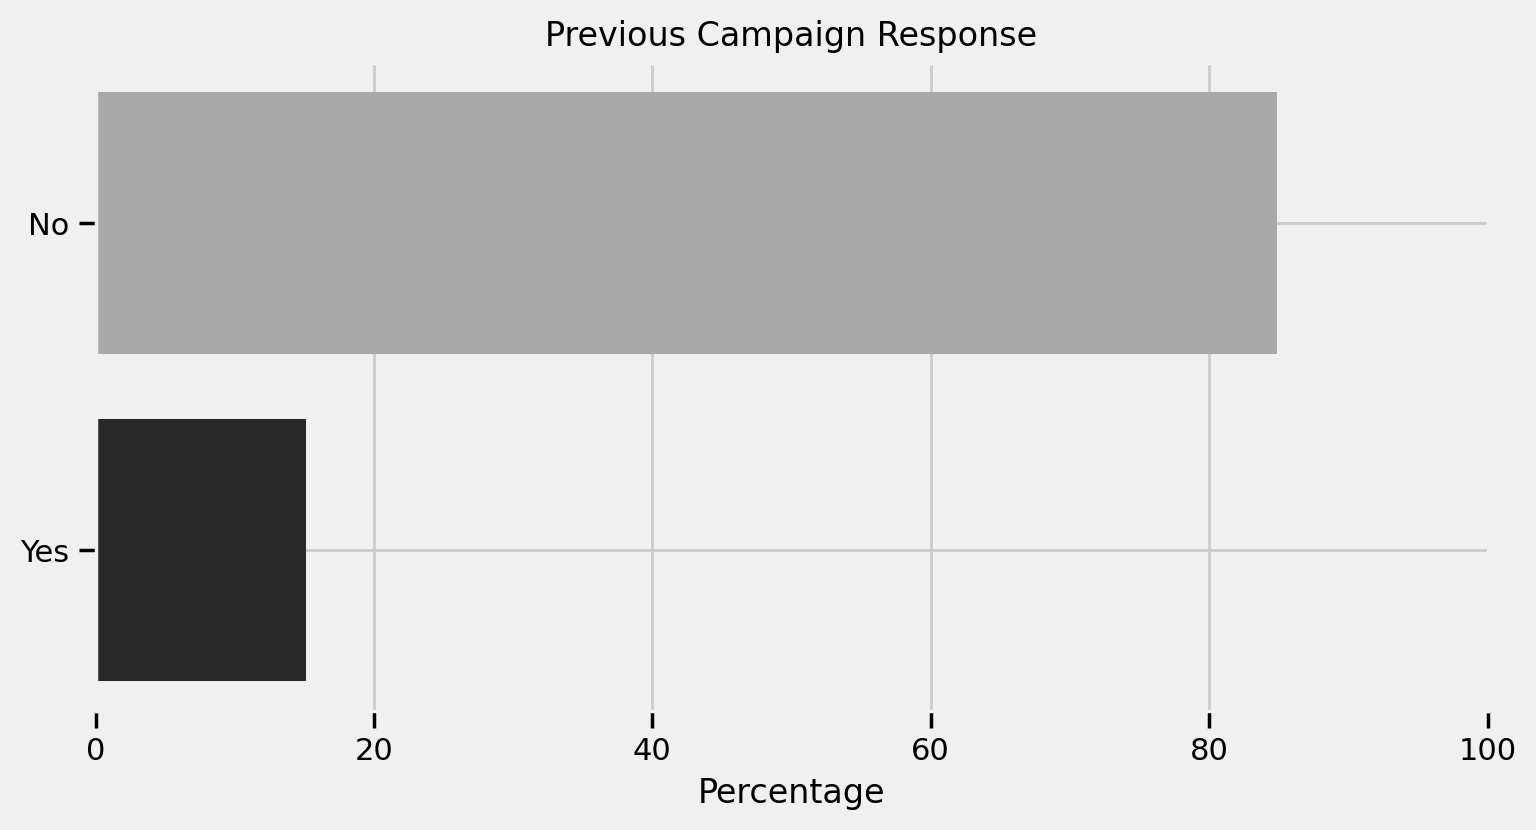

In [29]:
response_counts = data['Response'].value_counts()
percentage_zeros = (response_counts[0] / len(data)) * 100
percentage_ones = (response_counts[1] / len(data)) * 100
plt.figure(figsize=(8, 4))
plt.barh(['No', 'Yes'], [percentage_zeros, percentage_ones], color=['#A9A9A9', '#282828'])
plt.xlabel('Percentage')
plt.title('Previous Campaign Response')
plt.xlim(0, 100)
plt.gca().invert_yaxis()
plt.show()

# Customer Analysis
The data does contain the 15% success rate mentioned in the project briefing. We're now going to explore any common characteristics that can distinguish between these two groups - those that responded positively to the last campaign and those that didn't. The natural approach is to just check for differences based on similar groups of variables as follows:
* Behavioural Buying Patterns
  - Segement by products bought
  - Segment by buying methods